In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#checking the datas valuable description
pd.read_csv("VariableDefinitions (1).csv")

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [3]:
#examinining the train dataset
df_train=pd.read_csv("train.csv")
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df_train["marital_status"].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [5]:
#examining the test dataset
df_test=pd.read_csv("test.csv")
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
#getting the  shape of train  and test datsets
print(df_train.shape)
print(df_test.shape)

(23524, 13)
(10086, 12)


In [7]:
#submission files
submission=pd.read_csv("SampleSubmission.csv")
submission

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
...,...,...
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0


In [8]:
#descriptive discription about the  test dataset of numeric values of test_data
df_train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


hhalf of the people have 35yrs and below while 75% and below  have 49 yrs and below

In [10]:
#checking about the categprical distribution
df_train.describe(include="object")

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [11]:
#checking whether the dataset is balanced
df_train["bank_account"].value_counts()


No     20212
Yes     3312
Name: bank_account, dtype: int64

imbalanced dataset

In [12]:
#getting to know about datasets
df_train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

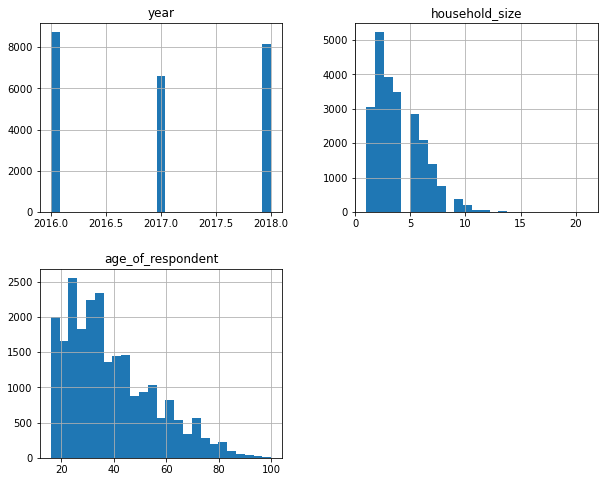

In [13]:
#checking some visiualization for normal disribution 
df_train.hist(bins=25,figsize=(10,8))
plt.show()

In [14]:
#checkinmg for normal distibution by use of kurtosis
df_train.kurtosis()

year                -1.605870
household_size       1.313302
age_of_respondent    0.100138
dtype: float64

the data  features shows  slightly  normal distibution

<AxesSubplot:>

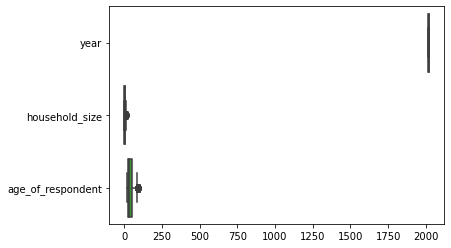

In [15]:
#by use of boxplots
sns.boxplot(data=df_train, orient="h")

<AxesSubplot:xlabel='count'>

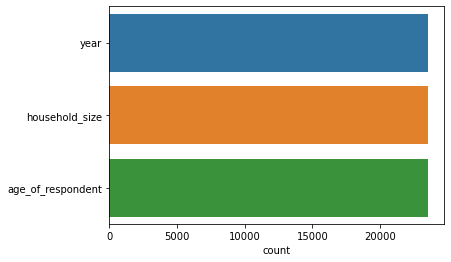

In [16]:
sns.countplot(data=df_train,orient="h")

In [17]:
df_train.select_dtypes(include="O")

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,uniqueid_2113,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,uniqueid_2114,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,uniqueid_2115,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,uniqueid_2116,No,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [18]:
#importing somme libraries for preeprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [19]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [20]:
df_train.head()
df_train.shape


(23524, 13)

In [21]:
#dividing the train data to depedent and indepedent variables
#transforming the target variable
df_train["bank_account"]=le.fit_transform(df_train["bank_account"])
y_train=df_train["bank_account"]
x_train=df_train.drop("bank_account",axis=1,inplace=True)


In [22]:
def preprocsessing_data(df_train):
    # categorical features to be onverted to One Hot Encoding
    ohe_df=pd.DataFrame(df_train, columns=["relationship_with_head","country","location_type"])
    # generate binary values using get_dummies
    dum_df = pd.get_dummies(ohe_df, columns=["relationship_with_head","country","location_type"], prefix=["Type_is","Type_is","Type_is"])
    # merge with main df bridge_df on key values
    df_train=df_train.join(dum_df)
    
    # Label Encoder conversion
    df_train["cellphone_access"] = le.fit_transform(df_train["cellphone_access"])
    df_train["gender_of_respondent"] = le.fit_transform(df_train["gender_of_respondent"])
    df_train["year"] = le.fit_transform(df_train["year"])
    df_train["marital_status"] = le.fit_transform(df_train["marital_status"])
    df_train["education_level"] = le.fit_transform(df_train["education_level"])
    df_train["job_type"] = le.fit_transform(df_train["job_type"])

    
    # drop uniquid column
    df_train=df_train.drop(columns=["uniqueid","relationship_with_head","country","location_type"],axis=1)
    
    # scale our data into range of 0 and 1
    scaler=StandardScaler() 
    df_train=scaler.fit_transform(df_train)
    
    return df_train
    

In [23]:
procesed_train=preprocsessing_data(df_train)
processd_test=preprocsessing_data(df_test)

In [24]:
print(procesed_train.shape)
print(processd_test.shape)

(23524, 20)
(10086, 20)


In [25]:
#spltting train data to test and validation dataset
from sklearn.model_selection import train_test_split
x_Train,x_valid,y_Train,y_valid=train_test_split(procesed_train,y_train,test_size=0.1,
                                                 stratify = y_train,
                                                 random_state=42)

In [26]:
#model building
#importing models from various libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
#builiding pippeline for the models
pipe_dt=Pipeline([("decision tree",DecisionTreeClassifier())])

pipe_rf=Pipeline([("random forest",RandomForestClassifier())])

pipe_svc=Pipeline([("svc",SVC())])

pipe_knearest=Pipeline([("kneigbour",KNeighborsClassifier())])

pipe_naibayes=Pipeline([("gaussian nb",GaussianNB())])

pipe_adboost=Pipeline([("adboost",AdaBoostClassifier())])

pipe_gradientboost=Pipeline([("gradient",GradientBoostingClassifier())])

pipe_extratree=Pipeline([("etra_tree",ExtraTreesClassifier())])

In [28]:
#forming a list for the modelels
pipe_models=[pipe_dt,pipe_rf,pipe_svc,pipe_knearest,pipe_naibayes,pipe_adboost,pipe_gradientboost,pipe_extratree]
pipe_models

[Pipeline(steps=[('decision tree', DecisionTreeClassifier())]),
 Pipeline(steps=[('random forest', RandomForestClassifier())]),
 Pipeline(steps=[('svc', SVC())]),
 Pipeline(steps=[('kneigbour', KNeighborsClassifier())]),
 Pipeline(steps=[('gaussian nb', GaussianNB())]),
 Pipeline(steps=[('adboost', AdaBoostClassifier())]),
 Pipeline(steps=[('gradient', GradientBoostingClassifier())]),
 Pipeline(steps=[('etra_tree', ExtraTreesClassifier())])]

In [29]:
pipe_dict={0:"DecisionTreeClassifier",
         1:"RandomForestClassifier",
         2:"SVC",
         3:"KNeighborsClassifier",
         4:"GaussianNB",
         5:"AdaBoostClassifier",
         6:"GradientBoostingClassifier",
         7:"ExtraTreesClassifier"}

In [30]:

#training the models
for model in pipe_models:
    model.fit(x_Train,y_Train)

In [31]:
#the scores of the models
for i,model in enumerate(pipe_models):
    print("{} valid score is {}".format(pipe_dict[i],model.score(x_valid,y_valid)))

DecisionTreeClassifier valid score is 0.8410539736506587
RandomForestClassifier valid score is 0.8631534211644709
SVC valid score is 0.8788780280492988
KNeighborsClassifier valid score is 0.8720781980450488
GaussianNB valid score is 0.7288567785805354
AdaBoostClassifier valid score is 0.885252868678283
GradientBoostingClassifier valid score is 0.8882277943051424
ExtraTreesClassifier valid score is 0.852953676158096


AdaBoostClassifier valid score and the GradientBoostingClassifier valid score  classifier gives the highest score and therefore we are going to hypertune them

In [32]:
#using grid search
adbost=AdaBoostClassifier()
param_grid={"n_estimators":[50,100,200,250,300,400,450,500],
            "learning_rate":[1.0,0.1,0.01]}
ad_bostgrid= GridSearchCV(adbost,param_grid,cv=5,n_jobs=1)

ad_bostgrid.fit(x_Train,y_Train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [1.0, 0.1, 0.01],
                         'n_estimators': [50, 100, 200, 250, 300, 400, 450,
                                          500]})

In [33]:
y_predict=ad_bostgrid.predict(x_valid)
print(confusion_matrix(y_valid,y_predict))
print("accuracy_score is",accuracy_score(y_valid,y_predict))
print("error is",1-accuracy_score(y_valid,y_predict))

[[1976   46]
 [ 227  104]]
accuracy_score is 0.8839779005524862
error is 0.11602209944751385


In [34]:
gradient=GradientBoostingClassifier(n_estimators=200,max_depth=4,min_samples_split=2,learning_rate=0.1, min_samples_leaf=2)
gradient.fit(x_Train,y_Train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, n_estimators=200)

In [35]:
y_predict=gradient.predict(x_valid)
print(confusion_matrix(y_valid,y_predict))
print("accuracy_score is",accuracy_score(y_valid,y_predict))
print("error is",1-accuracy_score(y_valid,y_predict))

[[1970   52]
 [ 207  124]]
accuracy_score is 0.8899277518062049
error is 0.11007224819379513


after hypertuning the model accuracy increased

In [36]:
prediction=gradient.predict(processd_test)
prediction

array([1, 1, 0, ..., 0, 0, 0])

In [37]:
#submission file
submission={"unique_id":df_test["uniqueid"],"bank_account":prediction}
submission_df=pd.DataFrame(submission)
submission_df

,unique_id,bank_account
0,uniqueid_6056,1
1,uniqueid_6060,1
2,uniqueid_6065,0
3,uniqueid_6072,0
4,uniqueid_6073,0
...,...,...
10081,uniqueid_2998,0
10082,uniqueid_2999,0
10083,uniqueid_3000,0
10084,uniqueid_3001,0


In [38]:
#Create submission csv file csv file
submission_df.to_csv('first_submission.csv', index = False)